In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df = pd.read_csv(r'../data/accent-recognition-mfcc/accent-mfcc-data-1.csv')
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [5]:
df.describe

<bound method NDFrame.describe of     language         X1        X2        X3         X4        X5         X6  \
0         ES   7.071476 -6.512900  7.650800  11.150783 -7.657312  12.484021   
1         ES  10.982967 -5.157445  3.952060  11.529381 -7.638047  12.136098   
2         ES   7.827108 -5.477472  7.816257   9.187592 -7.172511  11.715299   
3         ES   6.744083 -5.688920  6.546789   9.000183 -6.924963  11.710766   
4         ES   5.836843 -5.326557  7.472265   8.847440 -6.773244  12.677218   
..       ...        ...       ...       ...        ...       ...        ...   
324       US  -0.525273 -3.868338  3.548304   1.496249  3.490753   5.849887   
325       US  -2.094001 -1.073113  1.217397  -0.550790  2.666547   7.449942   
326       US   2.116909 -4.441482  5.350392   3.675396  2.715876   3.682670   
327       US   0.299616  0.324844  3.299919   2.044040  3.634828   6.693840   
328       US   3.214254 -3.135152  1.122691   4.712444  5.926518   6.915566   

            X7   

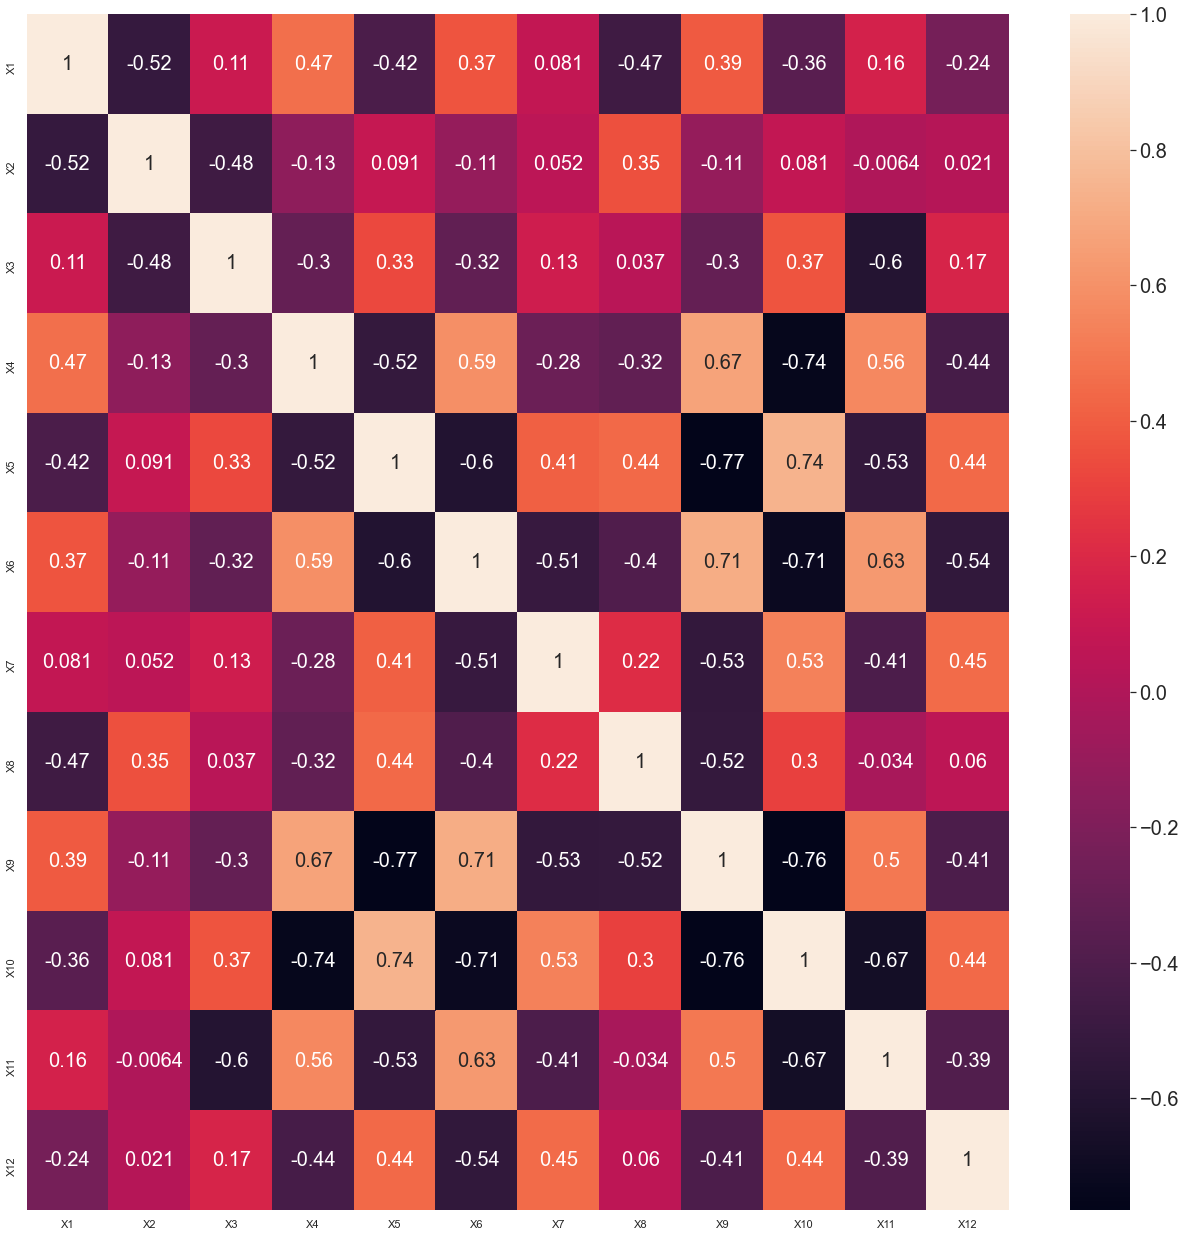

In [6]:
plt.figure(figsize=(22,22))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={'size': 20})
col_ax = plt.gcf().axes[-1]
col_ax.tick_params(labelsize=20)
plt.show()

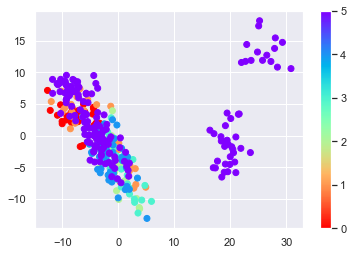

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
y = np.asarray(df.language)


label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

pca = PCA(n_components=2)

x = np.asarray(df.drop('language', axis=1))
proj = pca.fit_transform(x)

plt.scatter(proj[:, 0], proj[:, 1], c=y_encoded, cmap='rainbow_r')
plt.colorbar()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

rfc_model = RandomForestClassifier(100)
rfc_model.fit(X_train, Y_train)
y_pred = rfc_model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=df.language.unique()))

              precision    recall  f1-score   support

          ES       1.00      1.00      1.00         7
          FR       1.00      0.90      0.95        10
          GE       0.62      0.83      0.71         6
          IT       0.75      0.30      0.43        10
          UK       0.58      0.58      0.58        12
          US       0.80      0.87      0.83        54

    accuracy                           0.79        99
   macro avg       0.79      0.75      0.75        99
weighted avg       0.79      0.79      0.78        99



Text(89.18, 0.5, 'Predicted Label')

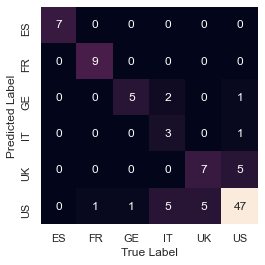

In [17]:
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=df.language.unique(), yticklabels=df.language.unique())
plt.xlabel('True Label')
plt.ylabel('Predicted Label')